#### Importing the Libraries

In [2]:
import numpy as np# to create array
import pandas as pd# to create the dataframe
import matplotlib.pyplot as plt# to plot graph
import seaborn as sns# for plotting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score# to check how well our model is performing

### Data Collection

In [3]:
wine_dataset=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
# checking the number of rows and columns
wine_dataset.shape

(1599, 12)

In [5]:
#checking the first rows of dataset
wine_dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and Visualization


In [7]:
#Statistical measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


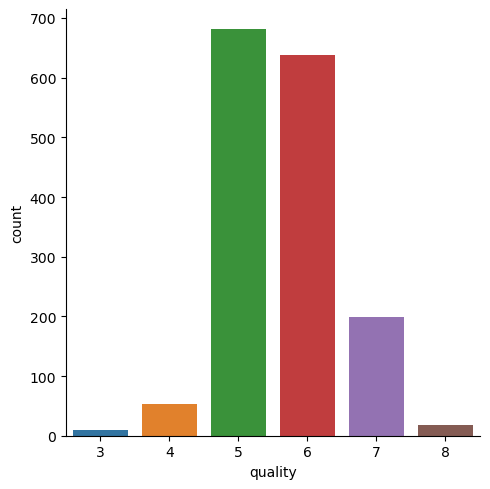

In [8]:
# Number of values for each quality
sns.catplot(x="quality",data=wine_dataset,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

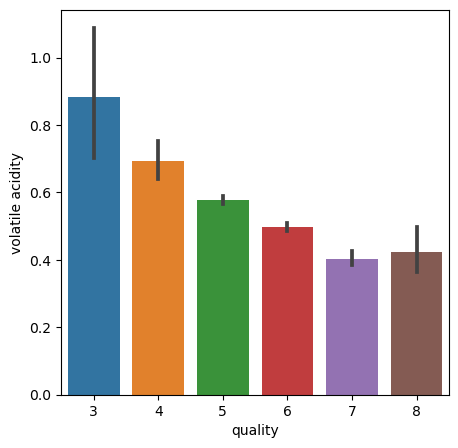

In [9]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5)) 
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

### Inference from Quality vs Volatile acidity:
When the volatile acidity value is high the quality is low(like 3) but when the volatile acidity is low like(0.4) the quality is high as 8 which means the volatile acidity and quality areinversely proportional.

### Citric acid vs quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

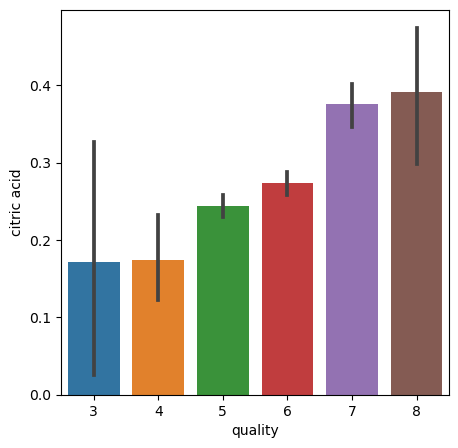

In [10]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

### Inference from Citric acid vs Quality
When the citric acid content is more then the quality of the wine is high

### Residual Sugar vs Quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

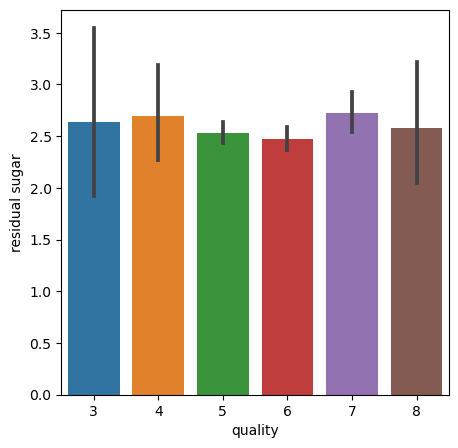

In [11]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wine_dataset)

### Inference from Residual sugar and quality
 Residual quality doesn't have a great impact in the quality

### Cloride vs Quality


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

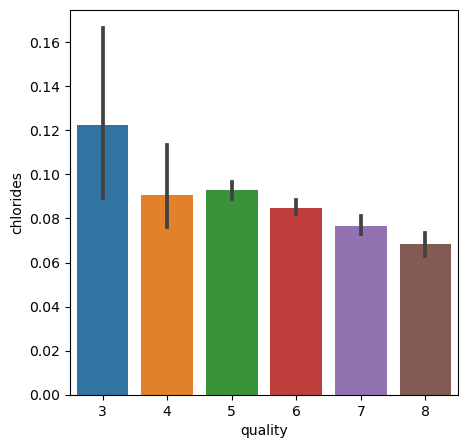

In [12]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=wine_dataset)

### Inference from Chloride vs Quality
They both are inversely proportional  when the Chloride is more then the quality is low wereas when the chloride is low the quality is high



### Free sulfur dioxide vs quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

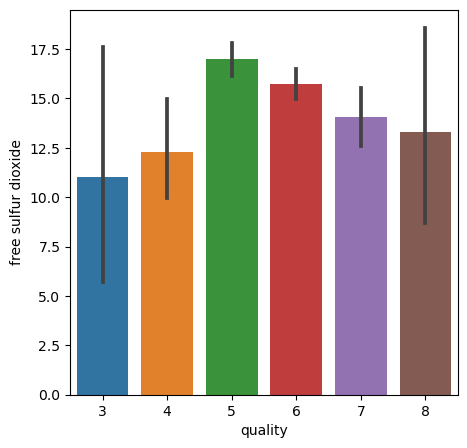

In [13]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_dataset)

### Total sulfur dioxide vs quality

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

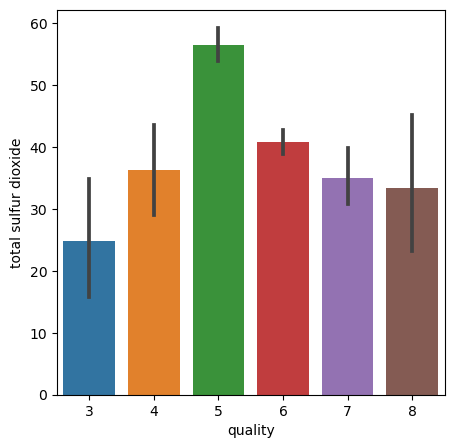

In [14]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_dataset)

### Creating Dist Plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a depre

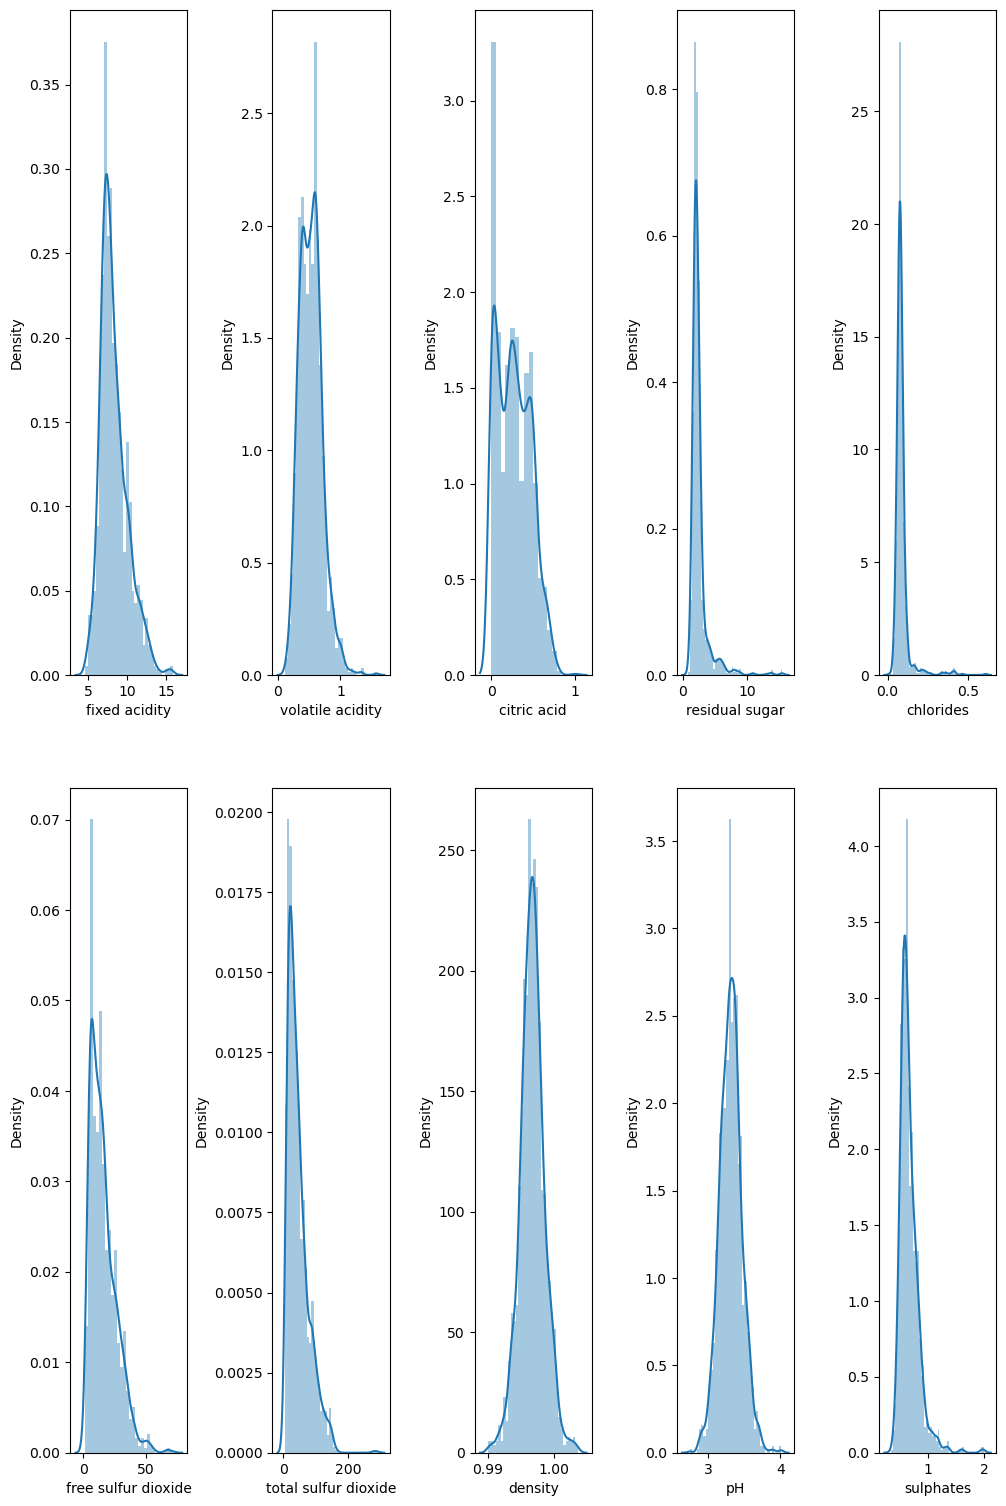

In [15]:
temp_wine_dataset=wine_dataset.drop(columns=['quality','alcohol'],axis=1)
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(10,15))
index=0
ax=ax.flatten()
for col in temp_wine_dataset:
    sns.distplot(temp_wine_dataset[col],ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5)

#### Correlation
To find the correlation between one column and the other column
1.Positive Correlation---->If one value increases the other value also increase--> Directly correlated.
2.Negative Correlation---->If one value decreases the other value also decrease--> Indirectly correlated.

In [16]:
correlation=wine_dataset.corr()


<AxesSubplot:>

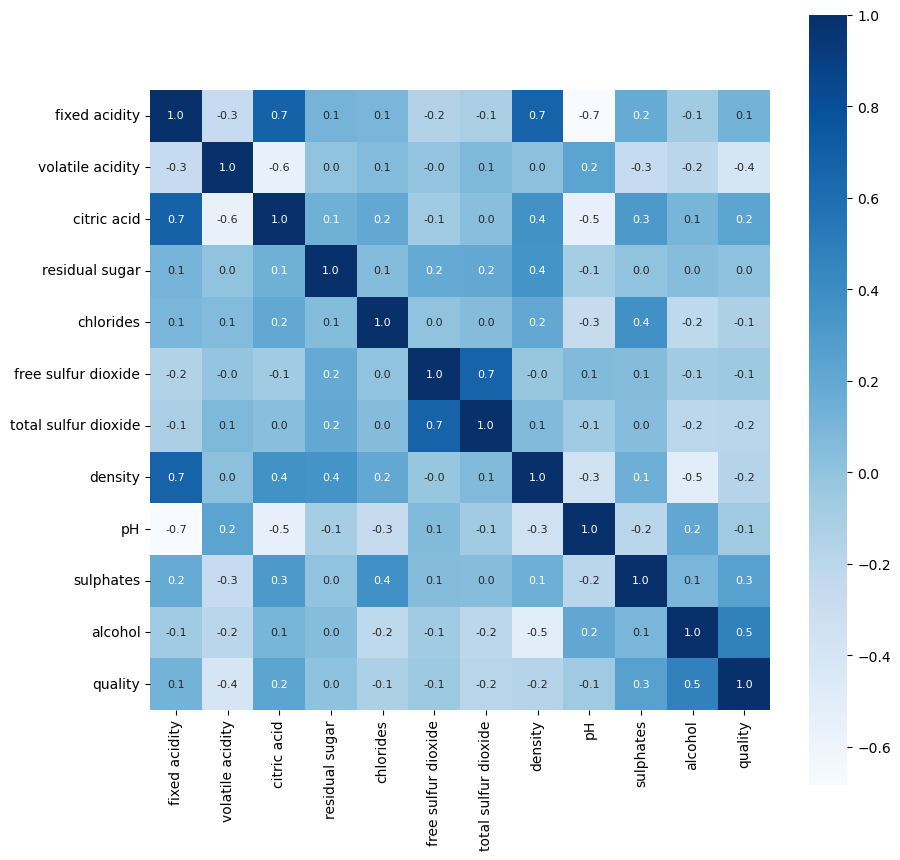

In [17]:
# Constructing a heat map to understand the correlation between the column
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#parametres-->* correration-->correlation of winedataset
#            *cbar-->colourbar which is on the right
#            *square-->True--> want all the values in the square
#            *fmt--->.1f--> one floating point value
#            *annot--> True-->anotations are labels(eg: fixed acidity,volatile acidity)
#            *annot_kws->size=8---> size of the annotations
#            *cmap--->blues---> colour of the map to be blue
#  dark blue means it is positively correlated and light blue means it is negatively correlated.
# Diagonal values(1.0) are insignificant so we need to ignore them.

### Data Preprocessing

In [18]:
# Seperating the data and the label
X=wine_dataset.drop('quality',axis=1)
print(X)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [19]:
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Train and Test Split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [21]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


### Model Training
### Random Forest Classifier


In [22]:
model=RandomForestClassifier()

 ### 

In [23]:
model.fit(X_train,Y_train)# train the model using train

RandomForestClassifier()

### Model Evaluation
Accuracy_score()----> evaluate the accuracy of the data using the test data


In [24]:
# accuracy on test_data
X_test_pred=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [25]:
print("Accuracy :",test_data_accuracy)

Accuracy : 0.934375


### Building a Predictive System

In [26]:
input_data=(7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8)#tuple
#Change the input data to a numpy array
input_data_numpy_array=np.asarray(input_data)
# Reshape the data as we are predicting the label for only one instance otherwise it will look for 1279 values
input_data_reshaped=input_data_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
    print("Good Quality wine")
else:
    print("Bad Quality wine")



[0]
Bad Quality wine


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
